# V1/V2 border and out-of-range border definitions 

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from alphashape import alphashape
import matplotlib.patches as patch
from shapely.geometry import Polygon, LineString, MultiPolygon

In [2]:
pic_directory = r'/media/mathis/Data/Mathis/V1-V2 border/'

In [3]:
awake_pic = plt.imread(pic_directory+'awake_annoted.png')
anesthesia_pic = plt.imread(pic_directory+'anesthesia_annoted.tiff')

In [27]:
# Define a polygon
polygon_coords = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
polygon = Polygon(polygon_coords)

# Define a LineString that splits the polygon
split_line = LineString([(1, -1), (1, 3)])

# Get the intersection points of the polygon with the split line
intersection_points = polygon.intersection(split_line)

# If the intersection is a MultiLineString, extract individual LineStrings
if intersection_points.geom_type == 'MultiLineString':
    intersection_lines = list(intersection_points)
else:
    intersection_lines = [intersection_points]

# Define two new polygons using the parts of the original polygon separated by the split line
new_polygons = []
for line in intersection_lines:
    new_polygon = polygon.difference(line.buffer(0.00001))  # Buffering to avoid topology exceptions
    new_polygons.append(new_polygon)

# Print or visualize the resulting polygons
for idx, poly in enumerate(new_polygons):
    print(f"Polygon {idx+1}: {poly}")


Polygon 1: MULTIPOLYGON (((0 0, 0 2, 0.99999 2, 0.99999 0, 0 0)), ((1.00001 2, 2 2, 2 0, 1.00001 0, 1.00001 2)))


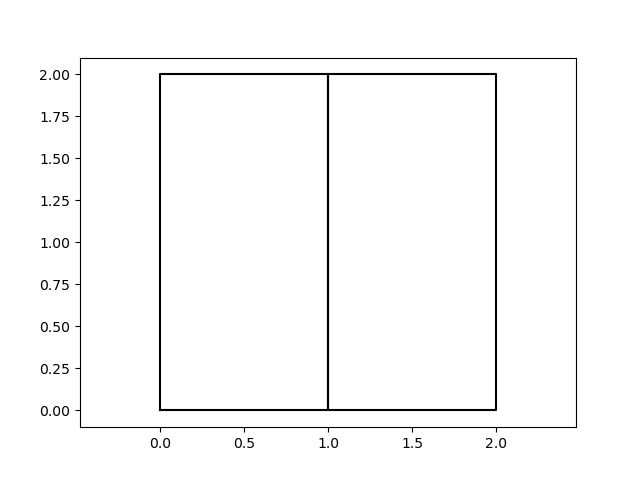

In [31]:
from shapely.geometry import Polygon, LineString, MultiPolygon
import matplotlib.pyplot as plt

# Define a function to visualize Shapely geometries
def plot_shapely_geometry(geometry, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    if geometry.geom_type == 'Polygon':
        x, y = geometry.exterior.xy
        ax.plot(x, y, color='black')
        for interior in geometry.interiors:
            x, y = interior.xy
            ax.plot(x, y, color='black')
    elif geometry.geom_type == 'MultiPolygon':
        for poly in geometry.geoms:
            x, y = poly.exterior.xy
            ax.plot(x, y, color='black')
            for interior in poly.interiors:
                x, y = interior.xy
                ax.plot(x, y, color='black')
    elif geometry.geom_type == 'LineString' or geometry.geom_type == 'MultiLineString':
        x, y = geometry.xy
        ax.plot(x, y, color='red')
    elif geometry.geom_type == 'Point' or geometry.geom_type == 'MultiPoint':
        x, y = geometry.xy
        ax.plot(x, y, 'o', color='black')
    else:
        raise ValueError('Unsupported geometry type: ' + geometry.geom_type)

# Define a polygon
polygon_coords = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
polygon = Polygon(polygon_coords)

# Define a LineString that splits the polygon
split_line = LineString([(1, -1), (1, 3)])

# Plot the original polygon and splitting line
fig, ax = plt.subplots()
plot_shapely_geometry(polygon, ax)
plot_shapely_geometry(split_line, ax)

# Get the intersection points of the polygon with the split line
intersection_points = polygon.intersection(split_line)

# If the intersection is a MultiLineString, extract individual LineStrings
if isinstance(intersection_points, MultiPolygon):
    intersection_lines = list(intersection_points)
else:
    intersection_lines = [intersection_points]

# Define two new polygons using the parts of the original polygon separated by the split line
new_polygons = []
for line in intersection_lines:
    new_polygon = polygon.difference(line.buffer(0.00001))  # Buffering to avoid topology exceptions
    new_polygons.append(new_polygon)

# Plot the resulting polygons
for idx, poly in enumerate(new_polygons):
    plot_shapely_geometry(poly, ax)

plt.axis('equal')
plt.show()


In [24]:
ln = LineString([[0,2],[4,2]])

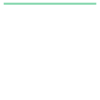

In [25]:
ln

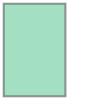

In [26]:
carr = sh.Polygon([[1,0],[3,0],[3,3],[1,3]])
carr

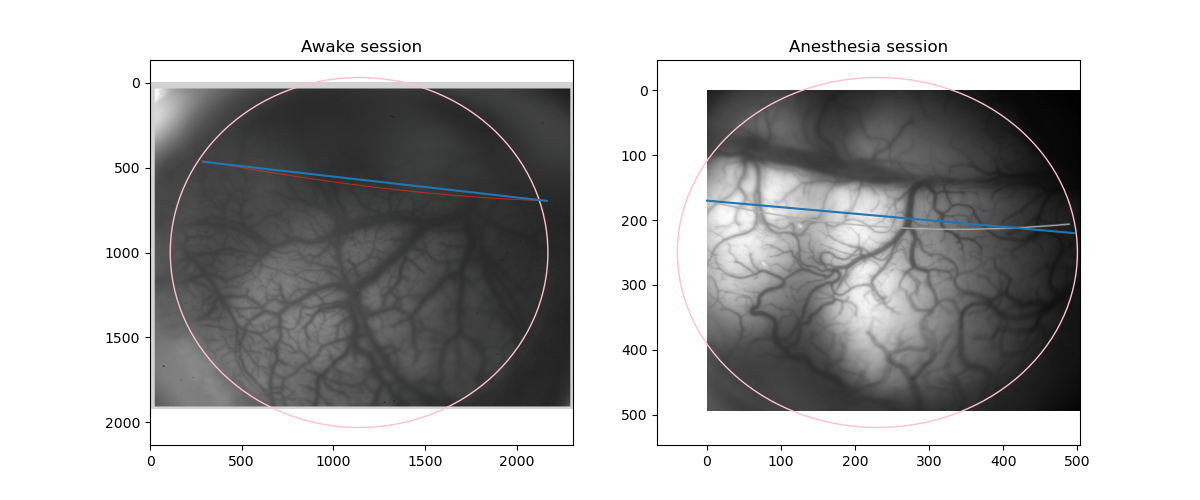

In [4]:
awake_circle = patch.Circle((1140,1000), 1030, color='pink',fill=False)
anesthesia_circle=patch.Circle((230,250),270,color='pink',fill=False)

fig, axs = plt.subplots(1,2,figsize=(12,5))
axs[0].set_title('Awake session')
axs[0].imshow(awake_pic,aspect='auto')
r=axs[0].plot([289,2164],[466,696])
axs[0].add_patch(awake_circle)

axs[1].set_title('Anesthesia session')
axs[1].imshow(np.flipud(anesthesia_pic), 'gray',aspect='auto')
axs[1].plot([0,495],[170,220])
axs[1].add_patch(anesthesia_circle)
plt.show()

In [5]:
type(r[0])

matplotlib.lines.Line2D

In [6]:
a = sh.LineString([[0, 0], [1, 0], [1, 2]])

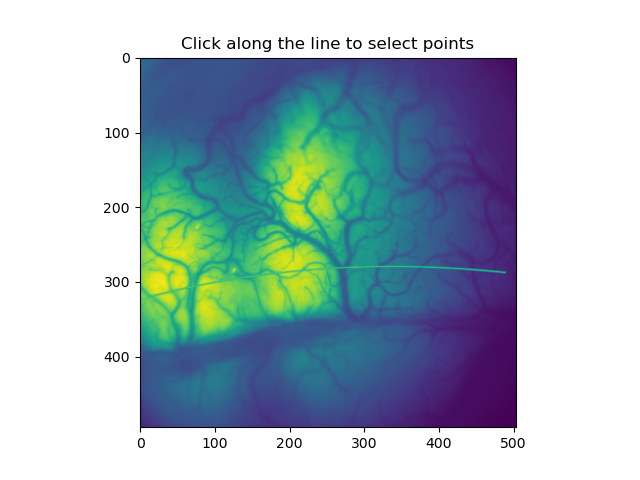

In [7]:

plt.figure()
# Load the image
image = plt.imread('anesthesia_annoted.tiff')

# Display the image
plt.imshow(image)
plt.title('Click along the line to select points')
plt.axis('on')

# Initialize a list to store the selected points
line_points = []

# Define a function to handle mouse click events
def onclick(event):
    # Check if the click event occurred within the axes of the image
    if event.inaxes == plt.gca():
        # Append the coordinates of the clicked point to the list
        line_points.append((event.xdata, event.ydata))
        # Plot a red circle at the clicked point
        plt.plot(event.xdata, event.ydata, 'ro')
        plt.draw()

# Connect the mouse click event to the onclick function
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

# Show the plot
plt.show()

# Print the coordinates of the selected points
for i, point in enumerate(line_points):
    print(f"Point {i+1}: ({point[0]}, {point[1]})")


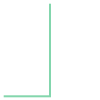

In [8]:
a

In [9]:
a.xy

(array('d', [0.0, 1.0, 1.0]), array('d', [0.0, 0.0, 2.0]))

In [10]:
Awake_frame = (360,436)
Anesthesia_frame = (250,250)

In [11]:
def circular_mask(shape, center, radius):
    Y, X = np.ogrid[:shape[0], :shape[1]]
    return ((X - center[0]) ** 2 + (Y - center[1]) ** 2) <= radius ** 2

In [12]:
Awake_pixel_spacing = 0.0566 #mm/px
Anesthesia_pixel_spacing = 0.0575 #mm/px

In [13]:
real_radius=9 #mm

In [14]:
real_radius/Anesthesia_pixel_spacing

156.52173913043478

In [15]:
real_radius/Awake_pixel_spacing

159.01060070671377

In [16]:
Awake_circ_border = circular_mask(Awake_frame, center=(220,190), radius=159)
Anesthesia_circ_border = circular_mask(Anesthesia_frame, center=(125,110), radius=157) 

Text(0.5, 1.0, 'Anesthesia session')

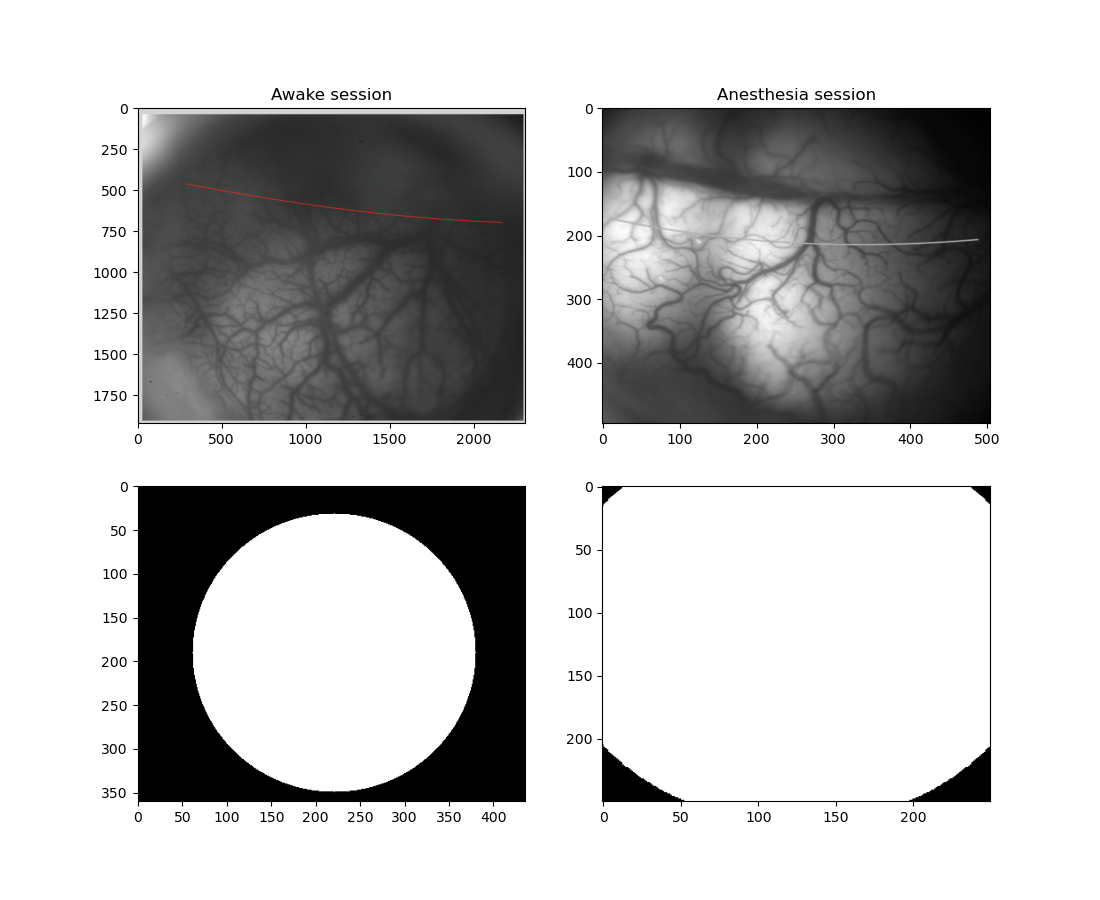

In [17]:
fig, axs = plt.subplots(2,2,figsize=(11,9))
axs[0,0].imshow(awake_pic,aspect='auto')
axs[0,1].imshow(np.flipud(anesthesia_pic), 'gray',aspect='auto')
axs[1,0].imshow(Awake_circ_border,'gray',aspect='auto')
axs[1,1].imshow(Anesthesia_circ_border, 'gray',aspect='auto')
axs[0,0].set_title('Awake session')
axs[0,1].set_title('Anesthesia session')

In [18]:
awake_pic.shape

(1921, 2306, 4)

In [19]:
Awake_frame

(360, 436)

In [20]:
360/436

0.8256880733944955

In [21]:
1921/2306

0.8330442324371206

In [22]:
anesthesia_pic.shape

(495, 504)

In [23]:
Anesthesia_frame

(250, 250)